## Observations and Insights 

In [118]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df=pd.merge(mouse_metadata,study_results,how="outer",on="Mouse ID")
# Display the data table for preview
combined_df.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [10]:
# Checking the number of mice.
print("number of mice",len(combined_df['Mouse ID'].unique()))

number of mice 249


In [11]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicateid=combined_df.loc[combined_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()


print("Duplicate Mouse ID：",duplicateid[0])

Duplicate Mouse ID： g989


In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatedata=combined_df.loc[combined_df['Mouse ID']==duplicateid[0]]
duplicatedata=duplicatedata.set_index("Mouse ID")
duplicatedata.head(50)

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_df=combined_df.drop(combined_df[combined_df['Mouse ID']==duplicateid[0]].index)
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df['Mouse ID'].unique())

248

## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumorvolume_df=cleaned_df.groupby('Drug Regimen')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumorvolume_summary=pd.DataFrame({"Mean":tumorvolume_df['Tumor Volume (mm3)'].mean(),
                                 "Median":tumorvolume_df['Tumor Volume (mm3)'].median(),
                                 "Variance":tumorvolume_df['Tumor Volume (mm3)'].var(),
                                 "Standard Deviantion":tumorvolume_df['Tumor Volume (mm3)'].std(),
                                 "SEM":tumorvolume_df['Tumor Volume (mm3)'].sem()})
tumorvolume_summary

,Mean,Median,Variance,Standard Deviantion,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumorvolume_df=cleaned_df.groupby('Drug Regimen')
tumorvolume_summary2=tumorvolume_df.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
tumorvolume_summary2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'total number of timepoints for all mice tested for each drug regimen')

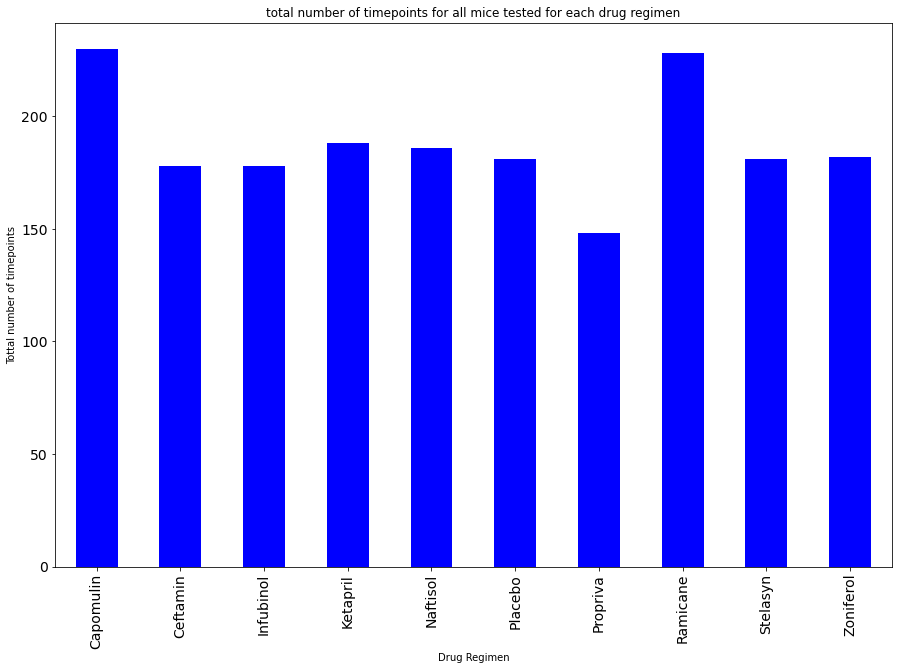

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
tumorvolume_df['Timepoint'].count().plot.bar(figsize=(15,10), color='b',fontsize = 14)
plt.ylabel("Tottal number of timepoints")
plt.title("total number of timepoints for all mice tested for each drug regimen")

Text(0.5, 1.0, 'total number of timepoints for all mice tested for each drug regimen')

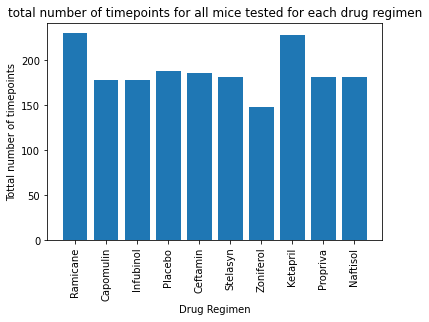

In [19]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugregimen=cleaned_df['Drug Regimen'].unique()
plt.bar(drugregimen,tumorvolume_df['Timepoint'].count())
plt.xticks(rotation="vertical")
plt.ylabel("Tottal number of timepoints")
plt.xlabel("Drug Regimen")
plt.title("total number of timepoints for all mice tested for each drug regimen")

Text(0.5, 1.0, ' distribution of female versus male mice')

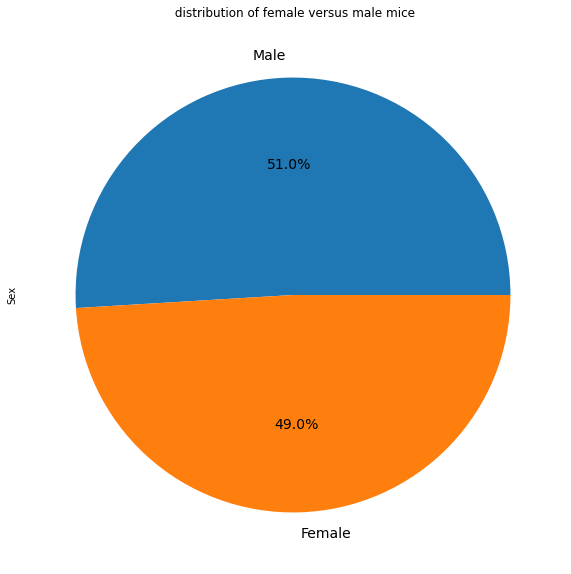

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
cleaned_df['Sex'].value_counts().plot.pie(figsize=(15,10),fontsize = 14,autopct="%1.1f%%",)
plt.title(" distribution of female versus male mice")

Text(0.5, 1.0, ' distribution of female versus male mice')

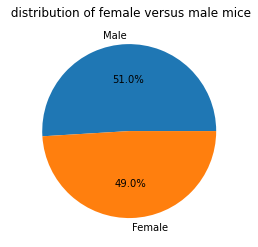

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex=cleaned_df['Sex'].unique()
plt.pie(cleaned_df['Sex'].value_counts(),labels=sex,autopct="%1.1f%%")
plt.title(" distribution of female versus male mice")

## Quartiles, Outliers and Boxplots

In [27]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Capomulin=cleaned_df.loc[cleaned_df['Drug Regimen']=="Capomulin",:].sort_values(['Timepoint'],ascending=False)
Ramicane=cleaned_df.loc[cleaned_df['Drug Regimen']=="Ramicane",:].sort_values(['Timepoint'],ascending=False)
Infubinol=cleaned_df.loc[cleaned_df['Drug Regimen']=="Infubinol",:].sort_values(['Timepoint'],ascending=False)
Ceftamin=cleaned_df.loc[cleaned_df['Drug Regimen']=="Ceftamin",:].sort_values(['Timepoint'],ascending=False)
Capomulin_max=Capomulin.drop_duplicates(['Mouse ID'],keep='first')
Ramicane_max=Ramicane.drop_duplicates(['Mouse ID'],keep='first')
Infubinol_max=Infubinol.drop_duplicates(['Mouse ID'],keep='first')
Ceftamin_max=Ceftamin.drop_duplicates(['Mouse ID'],keep='first')


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# combined_max=pd.DataFrame({"Capomulin_max":Capomulin_max['Tumor Volume (mm3)'],
#                           "Ramicane_max":Ramicane_max['Tumor Volume (mm3)'],
#                           "Infubinol_max":Infubinol_max['Tumor Volume (mm3)'],
#                           "Ceftamin_max":Ceftamin_max['Tumor Volume (mm3)']})
# combined_max

In [28]:
# Put treatments into a list for for loop (and later for plot labels)
Labels=['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
CapomulinIQR=Capomulin_max['Tumor Volume (mm3)'].quantile(0.75)-Capomulin_max['Tumor Volume (mm3)'].quantile(0.25)
RamicaneIQR=Ramicane_max['Tumor Volume (mm3)'].quantile(0.75)-Ramicane_max['Tumor Volume (mm3)'].quantile(0.25)
InfubinolIQR=Infubinol_max['Tumor Volume (mm3)'].quantile(0.75)-Infubinol_max['Tumor Volume (mm3)'].quantile(0.25)
CeftaminIQR=Ceftamin_max['Tumor Volume (mm3)'].quantile(0.75)-Ceftamin_max['Tumor Volume (mm3)'].quantile(0.25)

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [29]:
# Capomulin
print('The lower quartile of Capomulin tumors:', Capomulin_max['Tumor Volume (mm3)'].quantile(0.25))
print("The upper quartile of Capomulin tumors:",Capomulin_max['Tumor Volume (mm3)'].quantile(0.75))
print("The interquartile range of Capomulin tumors:",CapomulinIQR)
print("The median of Capomulin tumors:",Capomulin_max['Tumor Volume (mm3)'].quantile(0.5))


print(f"Values below {Capomulin_max['Tumor Volume (mm3)'].quantile(0.25)-1.5*CapomulinIQR} could be outliers.")
print(f"Values above {Capomulin_max['Tumor Volume (mm3)'].quantile(0.25)+1.5*CapomulinIQR} could be outliers.")


The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644
Values below 20.70456164999999 could be outliers.
Values above 44.05015203000001 could be outliers.


In [30]:
# Ramicane
print('The lower quartile of Ramicane tumors:', Ramicane_max['Tumor Volume (mm3)'].quantile(0.25))
print("The upper quartile of Ramicane tumors:",Ramicane_max['Tumor Volume (mm3)'].quantile(0.75))
print("The interquartile range of Ramicane tumors:",RamicaneIQR)
print("The median of Ramicane tumors:",Ramicane_max['Tumor Volume (mm3)'].quantile(0.5))



print(f"Values below {Ramicane_max['Tumor Volume (mm3)'].quantile(0.25)-1.5*RamicaneIQR} could be outliers.")
print(f"Values above {Ramicane_max['Tumor Volume (mm3)'].quantile(0.25)+1.5*RamicaneIQR} could be outliers.")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 45.20827463 could be outliers.


In [31]:
# Infubinol
print('The lower quartile of Infubinol tumors:', Infubinol_max['Tumor Volume (mm3)'].quantile(0.25))
print("The upper quartile of Infubinol tumors:",Infubinol_max['Tumor Volume (mm3)'].quantile(0.75))
print("The interquartile range of Infubinol tumors:",InfubinolIQR)
print("The median of Infubinol tumors:",Infubinol_max['Tumor Volume (mm3)'].quantile(0.5))



print(f"Values below {Infubinol_max['Tumor Volume (mm3)'].quantile(0.25)-1.5*InfubinolIQR} could be outliers.")
print(f"Values above {Infubinol_max['Tumor Volume (mm3)'].quantile(0.25)+1.5*InfubinolIQR} could be outliers.")


The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 71.26431043 could be outliers.


In [33]:
# Ceftamin
print('The lower quartile of Ceftamin tumors:', Ceftamin_max['Tumor Volume (mm3)'].quantile(0.25))
print("The upper quartile of Ceftamin tumors:",Ceftamin_max['Tumor Volume (mm3)'].quantile(0.75))
print("The interquartile range of Ceftamin tumors:",CeftaminIQR)
print("The median of Ceftamin tumors:",Ceftamin_max['Tumor Volume (mm3)'].quantile(0.5))



print(f"Values below {Ceftamin_max['Tumor Volume (mm3)'].quantile(0.25)-1.5*CeftaminIQR} could be outliers.")
print(f"Values above {Ceftamin_max['Tumor Volume (mm3)'].quantile(0.25)+1.5*CeftaminIQR} could be outliers.")


The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The interquartile range of Ceftamin tumors: 15.577752179999997
The median of Ceftamin tumors: 59.85195552
Values below 25.355449580000002 could be outliers.
Values above 72.08870612 could be outliers.


Text(0.5, 0, 'Drug Regimen')

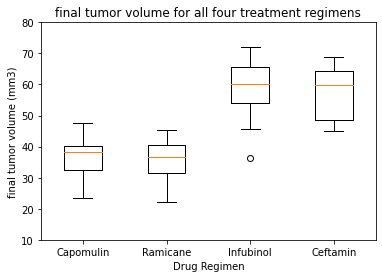

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


plt.boxplot([Capomulin_max['Tumor Volume (mm3)'],Ramicane_max['Tumor Volume (mm3)'],Infubinol_max['Tumor Volume (mm3)'],Ceftamin_max['Tumor Volume (mm3)']],labels=Labels,whiskerprops=None)
plt.ylim(10,80)
plt.title("final tumor volume for all four treatment regimens")
plt.ylabel("final tumor volume (mm3)")
plt.xlabel("Drug Regimen")

## Line and Scatter Plots

In [94]:
# input mouse id
print('Mouse ID',Capomulin['Mouse ID'].unique())
mouseid=input("Which Mouse ID you like to plot?")


Mouse ID ['r554' 'w914' 'g316' 'm601' 'u364' 'g288' 'r944' 'b128' 's710' 'y793'
 'x401' 'i557' 'v923' 'l897' 'j119' 'l509' 'm957' 'i738' 's185' 'b742'
 't565' 'j246' 'f966' 'r157' 'w150']


Which Mouse ID you like to plot? r554


Text(0, 0.5, 'Tumor Volume (mm3)')

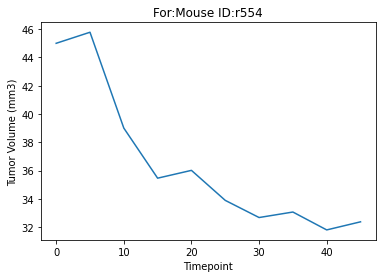

In [95]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse=Capomulin.loc[Capomulin['Mouse ID']==mouseid,:]
plt.plot(mouse['Timepoint'],mouse['Tumor Volume (mm3)'])
plt.title(f"For:Mouse ID:{mouseid}")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

Text(0.5, 1.0, 'average tumor volume vs. mouse weight')

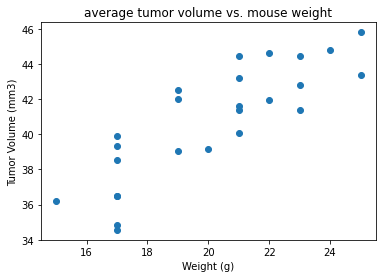

In [155]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_df=Capomulin.groupby('Mouse ID')
df=pd.DataFrame({"x_axis":scatter_df['Weight (g)'].mean(),
                "y_axis": scatter_df['Tumor Volume (mm3)'].mean()})


plt.scatter(df['x_axis'],df['y_axis'])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("average tumor volume vs. mouse weight")

## Correlation and Regression

In [156]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=st.pearsonr(df['x_axis'],df['y_axis'])
print(f"The correlation between  average tumor volume and mouse {round(correlation[0],2)}")


The correlation between  average tumor volume and mouse 0.84


In [162]:
from sklearn import datasets
from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(df['x_axis'],df['y_axis'])

regress_values = df['x_axis'] * slope + intercept
line_eq = "y=" + str(round(slope,2)) + "x +" + str(round(intercept,2))
line_eq

'y=0.95x +21.55'

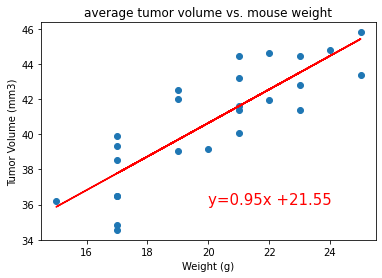

In [168]:
plt.scatter(df['x_axis'],df['y_axis'])
plt.plot(df['x_axis'],regress_values,'r')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("average tumor volume vs. mouse weight")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.show()